In [228]:
#Item 4

import matplotlib.pyplot as plt
import numpy as np

In [229]:
#Doy valor a los parametros
p = 0.4
sig = 1.6
gam = 1.6
w1 = 0.5
w2 = 0.5
ro1 = 0.5
mu1 = 0.2
ro2 = 1
mu2 = 0.6

In [230]:
#Defino las funciones de mi sistemas de ecuaciones
#Supongo mutualismo
fun1 = lambda n1, n2, w, t: gam*w*n1 / (1+sig*w) + n1**2 + mu1*n1*n2
fun2 = lambda n1, n2, w, t: gam*w*n2 / (1+sig*w) + n2**2 + mu2*n1*n2
fun3 = lambda n1, n2, w, t: p - (1 - (ro1*n1 + ro2*n2))*w + (n1 + n2)*(w**2)

#Esta funcion me devuelve un vector cuyas entradas son las funciones evaluadas en (X, t)
def F(t, X):
    return np.array([fun1(X[0], X[1], X[2], t),
                     fun2(X[0], X[1], X[2], t),
                     fun3(X[0], X[1], X[2], t)])

#Parametros: v_fun = vector de funciones, interval = intervalo donde busco soluciones
#            X0 = condiciones iniciales, h = paso con el que el metodo avanza
def Runge_Kutta_Sistema(v_fun, interval, X0, h):
    X_i = X0
    t_i = interval[0]
    its =  int(np.abs(interval[0] - interval[1]) / np.abs(h))
    sol = [X0]

    for _ in range(its - 1):
        F1 = h*v_fun(t_i, X_i)
        F2 = h*v_fun(t_i + h/2, X_i + F1/2)
        F3 = h*v_fun(t_i + h/2, X_i + F2/2)
        F4 = h*v_fun(t_i + h, X_i + F3)
        X_i += (F1 + 2*F2 + 2*F3 + F4)/6
        t_i += h
        sol.append(X_i.tolist())
    return np.array(sol)

In [231]:
#Valores iniciales
n1_0 = 0.5
n2_0 = 0.5
w_0 = 0.25

In [232]:
#Distinas soluciones variando el parametro p

p = 0.2
sols_p02 = Runge_Kutta_Sistema(F, [0,0.5], [n1_0, n2_0, w_0], 0.0025)

p = 0.4
sols_p04 = Runge_Kutta_Sistema(F, [0,0.5], [n1_0, n2_0, w_0], 0.0025)

p = 0.6
sols_p06 = Runge_Kutta_Sistema(F, [0,0.5], [n1_0, n2_0, w_0], 0.0025)

p = 0.8
sols_p08 = Runge_Kutta_Sistema(F, [0,0.5], [n1_0, n2_0, w_0], 0.0025)

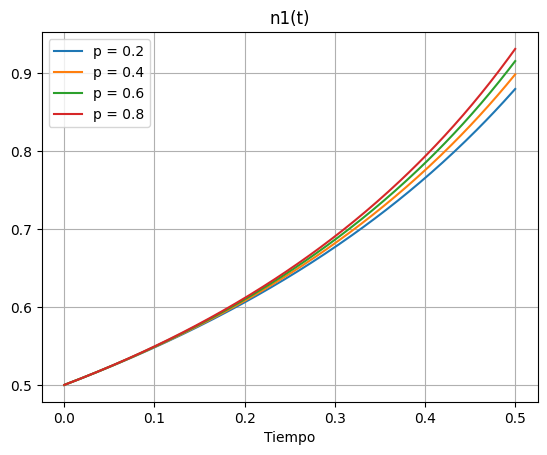

In [233]:
fig, ax = plt.subplots(1,1)
x = np.linspace(0,0.5,200)

ax.plot(x, sols_p02[:,0], label='p = 0.2')
ax.plot(x, sols_p04[:,0], label='p = 0.4')
ax.plot(x, sols_p06[:,0], label='p = 0.6')
ax.plot(x, sols_p08[:,0], label='p = 0.8')

ax.grid()
ax.legend()
plt.xlabel('Tiempo')
plt.title('n1(t)')
plt.show()

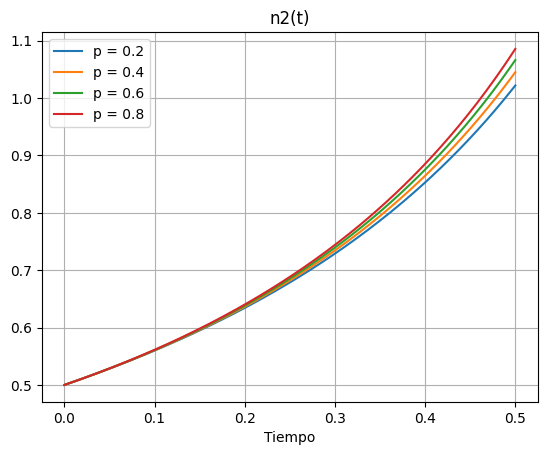

In [234]:
fig, ax = plt.subplots(1,1)

ax.plot(x, sols_p02[:,1], label='p = 0.2')
ax.plot(x, sols_p04[:,1], label='p = 0.4')
ax.plot(x, sols_p06[:,1], label='p = 0.6')
ax.plot(x, sols_p08[:,1], label='p = 0.8')

ax.grid()
ax.legend()
plt.xlabel('Tiempo')
plt.title('n2(t)')
plt.show()

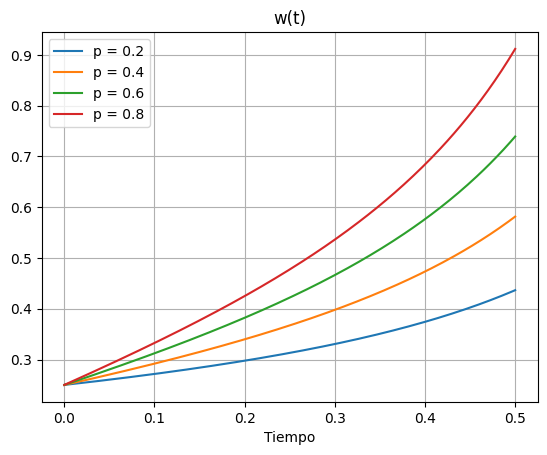

In [235]:
fig, ax = plt.subplots(1,1)

ax.plot(x, sols_p02[:,2], label='p = 0.2')
ax.plot(x, sols_p04[:,2], label='p = 0.4')
ax.plot(x, sols_p06[:,2], label='p = 0.6')
ax.plot(x, sols_p08[:,2], label='p = 0.8')

ax.grid()
ax.legend()
plt.xlabel('Tiempo')
plt.title('w(t)')
plt.show()

Todas las conclusiones siguientes son con respecto a las condiciones iniciales elegidas. Estas conclusiones podrían no ser las mismas al cambiarse las condiciones iniciales.

Se puede ver que al variar p (Promedio de precipitaciones anuales) no cambia mucho en cómo se desarrollarán las especies de vegetación, pero sí se puede ver que la evolución de la humedad se verá muy marcada por este parámetro, ya que hay una diferencia mucho más grande entre esta función w(t) que con respecto a las otras n1(t) y n2(t).

In [236]:
#Ahora realizare el mismo trabajo pero suponiendo competencia entre las distintas especies de vegetación
fun1 = lambda n1, n2, w, t: gam*w*n1 / (1+sig*w) + n1**2 - mu1*n1*n2
fun2 = lambda n1, n2, w, t: gam*w*n2 / (1+sig*w) + n2**2 - mu2*n1*n2
fun3 = lambda n1, n2, w, t: p - (1 - (ro1*n1 + ro2*n2))*w + (n1 + n2)*(w**2)

In [237]:
#Distinas soluciones variando el parametro p

p = 0.2
sols_p02 = Runge_Kutta_Sistema(F, [0,0.5], [n1_0, n2_0, w_0], 0.0025)

p = 0.4
sols_p04 = Runge_Kutta_Sistema(F, [0,0.5], [n1_0, n2_0, w_0], 0.0025)

p = 0.6
sols_p06 = Runge_Kutta_Sistema(F, [0,0.5], [n1_0, n2_0, w_0], 0.0025)

p = 0.8
sols_p08 = Runge_Kutta_Sistema(F, [0,0.5], [n1_0, n2_0, w_0], 0.0025)

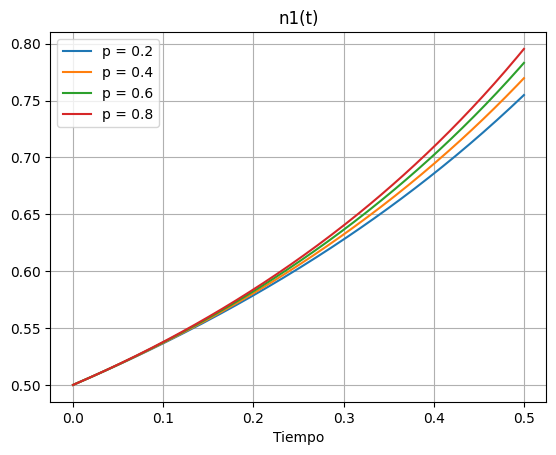

In [238]:
fig, ax = plt.subplots(1,1)

ax.plot(x, sols_p02[:,0], label='p = 0.2')
ax.plot(x, sols_p04[:,0], label='p = 0.4')
ax.plot(x, sols_p06[:,0], label='p = 0.6')
ax.plot(x, sols_p08[:,0], label='p = 0.8')

ax.grid()
ax.legend()
plt.xlabel('Tiempo')
plt.title('n1(t)')
plt.show()

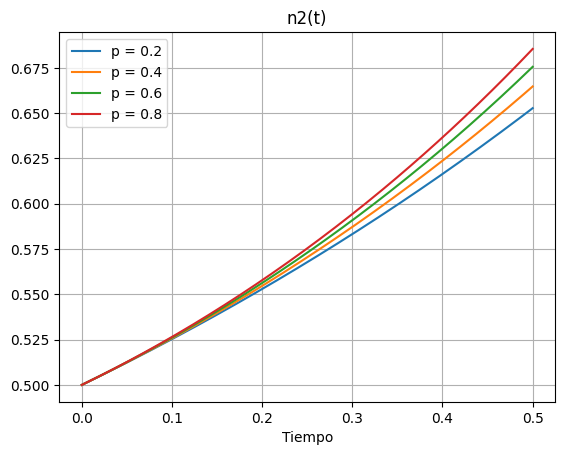

In [239]:
fig, ax = plt.subplots(1,1)

ax.plot(x, sols_p02[:,1], label='p = 0.2')
ax.plot(x, sols_p04[:,1], label='p = 0.4')
ax.plot(x, sols_p06[:,1], label='p = 0.6')
ax.plot(x, sols_p08[:,1], label='p = 0.8')

ax.grid()
ax.legend()
plt.xlabel('Tiempo')
plt.title('n2(t)')
plt.show()

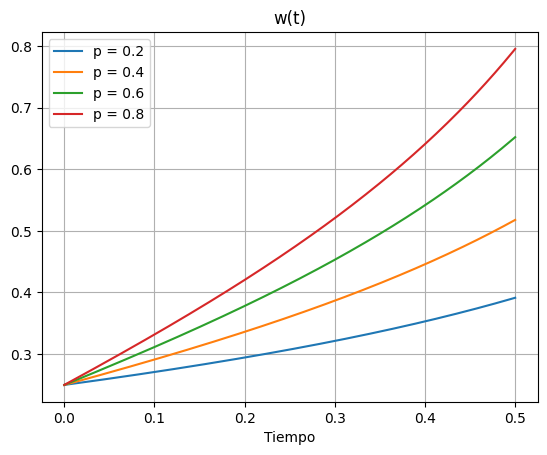

In [240]:
fig, ax = plt.subplots(1,1)

ax.plot(x, sols_p02[:,2], label='p = 0.2')
ax.plot(x, sols_p04[:,2], label='p = 0.4')
ax.plot(x, sols_p06[:,2], label='p = 0.6')
ax.plot(x, sols_p08[:,2], label='p = 0.8')

ax.grid()
ax.legend()
plt.xlabel('Tiempo')
plt.title('w(t)')
plt.show()

Cuando supongo competencia en mi modelo, se puede ver que las vegetaciones crecerán menos que en el caso de mutualismo, lo cual es esperado, y a su vez, la humedad seguirá dependiendo fuertemente del parámetro p, pero en este caso de competencia también crecerá un poco menos que en el caso de mutualismo. Para resaltar la diferencia entre mutualismo y competencia, graficaré en un solo gráfico cómo evolucionarían ambas vegetaciones y la humedad en ambos casos con un p fijo de 0.4.

In [241]:
fun1 = lambda n1, n2, w, t: gam*w*n1 / (1+sig*w) + n1**2 + mu1*n1*n2
fun2 = lambda n1, n2, w, t: gam*w*n2 / (1+sig*w) + n2**2 + mu2*n1*n2
fun3 = lambda n1, n2, w, t: p - (1 - (ro1*n1 + ro2*n2))*w + (n1 + n2)*(w**2)

p = 0.4
sols_mutualismo = Runge_Kutta_Sistema(F, [0,0.5], [n1_0, n2_0, w_0], 0.0025)

fun1 = lambda n1, n2, w, t: gam*w*n1 / (1+sig*w) + n1**2 - mu1*n1*n2
fun2 = lambda n1, n2, w, t: gam*w*n2 / (1+sig*w) + n2**2 - mu2*n1*n2
fun3 = lambda n1, n2, w, t: p - (1 - (ro1*n1 + ro2*n2))*w + (n1 + n2)*(w**2)

sols_competencia = Runge_Kutta_Sistema(F, [0,0.5], [n1_0, n2_0, w_0], 0.0025)

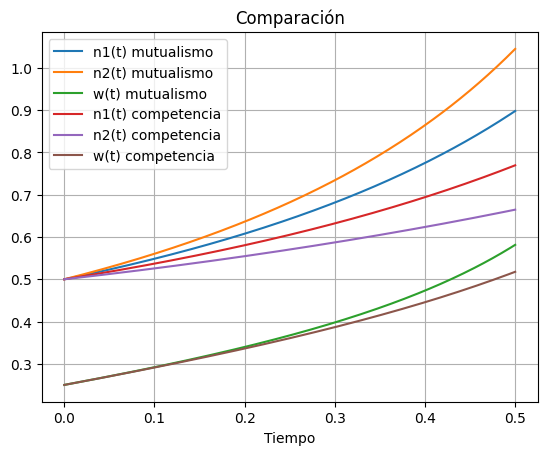

In [242]:
fig, ax = plt.subplots(1,1)

ax.plot(x, sols_mutualismo[:,0], label='n1(t) mutualismo')
ax.plot(x, sols_mutualismo[:,1], label='n2(t) mutualismo')
ax.plot(x, sols_mutualismo[:,2], label='w(t) mutualismo')

ax.plot(x, sols_competencia[:,0], label='n1(t) competencia')
ax.plot(x, sols_competencia[:,1], label='n2(t) competencia')
ax.plot(x, sols_competencia[:,2], label='w(t) competencia')

ax.grid()
ax.legend()
plt.xlabel('Tiempo')
plt.title('Comparación')
plt.show()

Como observación final, se puede ver que la especie n2 crece más que la n1 en el caso de mutualismo y crece menos que n1 en el caso de competencia, y como se dijo antes, la humedad crece más en el caso de mutualismo que en el de competencia.